In [3]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Tires and Conditions

In [31]:
tires = {"hoosier_r25b_18x7-5_10x8":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1


### Import Tire Data

In [32]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
        # print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))

      Unnamed: 0      ET      V       N     SA     IA      RL      RE      P  \
0              0  267.59  40.33  480.23  0.005 -0.037  21.587  22.283  83.08   
1              1  267.60  40.34  479.95  0.048 -0.034  21.584  22.300  82.93   
2              2  267.61  40.33  479.61  0.096 -0.024  21.580  22.311  83.08   
3              3  267.62  40.33  479.47  0.144 -0.028  21.580  22.317  83.23   
4              4  267.63  40.34  479.27  0.175 -0.034  21.582  22.332  83.49   
...          ...     ...    ...     ...    ...    ...     ...     ...    ...   
7666        7666  426.29  40.29  475.65 -0.161 -0.036  22.174  22.474  83.59   
7667        7667  426.30  40.29  475.99 -0.124 -0.025  22.167  22.455  83.64   
7668        7668  426.31  40.28  476.26 -0.083 -0.033  22.170  22.440  83.79   
7669        7669  426.32  40.29  476.47 -0.038 -0.031  22.168  22.433  83.79   
7670        7670  426.33  40.30  476.47 -0.007 -0.028  22.163  22.438  83.89   

          FX  ...   TSTI   TSTC   TSTO 

### Verify Data (Make Sure this Looks as Expected)

In [22]:
df = tires["hoosier_r25b_18x7-5_10x8"]["lat"]
temp_df = df[(df["load"] == -200 / 0.224809)]

# print(temp_df)

curve = np.poly1d(np.polyfit(temp_df["SA"], temp_df["MZ"], 10))

polyline = np.linspace(temp_df["SA"].min(), temp_df["SA"].max(), 50)

plt.plot(polyline, curve(polyline))
plt.scatter(temp_df["SA"], temp_df["MZ"], s=1)
# plt.plot(temp_df["SA"], temp_df["MZ"])
plt.ylabel("Aligning Moment")
plt.xlabel("Slip Ratio (%)")

TypeError: expected non-empty vector for x

No handles with labels found to put in legend.


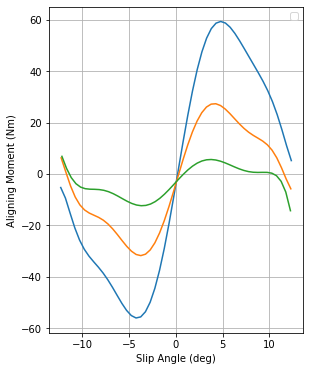

In [11]:
fig = plt.figure(figsize=(10,6))
count = 0
for name, tire in tires.items():
    if tire["lat"] is not None:
        count += 1
        fig.add_subplot(1, 2, count)
        for load in tire["lat"]["load"].unique():
            temp_df = tire["lat"][tire["lat"]["load"] == load]

            curve = np.poly1d(np.polyfit(temp_df["SA"], temp_df["MZ"], 10))

            polyline = np.linspace(temp_df["SA"].min(), temp_df["SA"].max(), 50)

            plt.plot(polyline, curve(polyline))

            # plt.scatter(temp_df["SA"], temp_df["MZ"], label = load, s=1)

        plt.legend()
        plt.ylabel("Aligning Moment (Nm)")
        plt.xlabel("Slip Angle (deg)")
        plt.grid(True)
plt.show()